# Text Emotion Classification - Valentina/Varun Project Group 10 Code DistilBERT Classification

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
df_train = pd.read_csv('train.txt', delimiter=';', header=None, names=['sentence','label'])
df_test = pd.read_csv('test.txt', delimiter=';', header=None, names=['sentence','label'])
df_val = pd.read_csv('val.txt', delimiter=';', header=None, names=['sentence','label'])

In [9]:
df_train_labelcounts = df_train.label.value_counts()
mylabels = [ "Joy","Sadness" , "Anger", "Fear", "Love", "Surprise"]

([<matplotlib.patches.Wedge at 0x7fb6816cd710>,
 [Text(0.5446292735316758, 0.9557086137585865, 'Joy'),
  Text(-1.0921193310892852, 0.13143578911807968, 'Sadness'),
  Text(-0.37768765992083225, -1.0331273065520656, 'Anger'),
  Text(0.4821866203826105, -0.9886840056984822, 'Fear'),
  Text(0.9753570501277893, -0.5086045858680565, 'Love'),
  Text(1.0930695989612655, -0.12328362351366204, 'Surprise')],
 [Text(0.2970705128354595, 0.5212956075046835, '33.5%'),
  Text(-0.5957014533214282, 0.07169224860986163, '29.2%'),
  Text(-0.20601145086590847, -0.5635239853920357, '13.5%'),
  Text(0.2630108838450602, -0.5392821849264448, '12.1%'),
  Text(0.5320129364333396, -0.277420683200758, '8.2%'),
  Text(0.5962197812515994, -0.06724561282563384, '3.6%')])

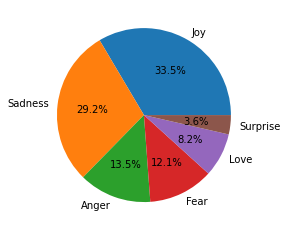

In [10]:
plt.pie(df_train_labelcounts, labels = mylabels, autopct='%1.1f%%')

In [11]:
df_test_labelcounts = df_test.label.value_counts()
mylabels = [ "Joy","Sadness" , "Anger", "Fear", "Love", "Surprise"]

([<matplotlib.patches.Wedge at 0x7fb681542a10>,
 [Text(0.5446292735316758, 0.9557086137585865, 'Joy'),
  Text(-1.0921193310892852, 0.13143578911807968, 'Sadness'),
  Text(-0.37768765992083225, -1.0331273065520656, 'Anger'),
  Text(0.4821866203826105, -0.9886840056984822, 'Fear'),
  Text(0.9753570501277893, -0.5086045858680565, 'Love'),
  Text(1.0930695989612655, -0.12328362351366204, 'Surprise')],
 [Text(0.2970705128354595, 0.5212956075046835, '33.5%'),
  Text(-0.5957014533214282, 0.07169224860986163, '29.2%'),
  Text(-0.20601145086590847, -0.5635239853920357, '13.5%'),
  Text(0.2630108838450602, -0.5392821849264448, '12.1%'),
  Text(0.5320129364333396, -0.277420683200758, '8.2%'),
  Text(0.5962197812515994, -0.06724561282563384, '3.6%')])

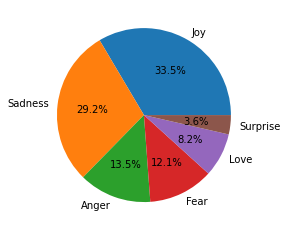

In [12]:
plt.pie(df_train_labelcounts, labels = mylabels, autopct='%1.1f%%')

In [13]:
df_train.columns
#Note: label is my y(target)

Index(['sentence', 'label'], dtype='object')

In [14]:
y_train = pd.get_dummies(df_train.label)
y_test = pd.get_dummies(df_test.sentence)
X_train = df_train.drop(columns="label")
X_test = df_test.drop(columns="label")

In [15]:
df_test.head()

,sentence,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [16]:
#get_dummies() function is used to convert categorical variable into dummy/indicator variables.
df_train_dummies = pd.get_dummies(df_train.label)
df_train_dummies

,anger,fear,joy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
15995,0,0,0,0,1,0
15996,0,0,0,0,1,0
15997,0,0,1,0,0,0
15998,1,0,0,0,0,0


In [17]:
df_test_dummies = pd.get_dummies(df_test.label)
df_test_dummies

,anger,fear,joy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1995,1,0,0,0,0,0
1996,1,0,0,0,0,0
1997,0,0,1,0,0,0
1998,0,0,1,0,0,0


In [18]:
print('size of training set: %s' % (len(df_train['sentence'])))
print('size of validation set: %s' % (len(df_val['sentence'])))
print('size of testing set: %s' % (len(df_test['sentence'])))

size of training set: 16000
size of validation set: 2000
size of testing set: 2000


In [19]:
#Checking how the data is distributed.
# We can see that the data is inbalanced, since joy has the highest number of avalible text, and surprise has the least.
print(df_train.label.value_counts())

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64


In [20]:
print(df_test.label.value_counts())

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: label, dtype: int64


## DistilBERT

In [21]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [23]:
# Define the maximum number of words to tokenize (DistilBERT can tokenize up to 512)
MAX_LENGTH = 128


# Define function to encode text data in batches
def batch_encode(tokenizer, texts, batch_size=256, max_length=MAX_LENGTH):
    input_ids = []
    attention_mask = []
    
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer.batch_encode_plus(batch,
                                             max_length=max_length,
                                             #padding='longest', #implements dynamic padding
                                             padding='max_length',
                                             truncation=True,
                                             return_attention_mask=True,
                                             return_token_type_ids=False
                                             )
        input_ids.extend(inputs['input_ids'])
        attention_mask.extend(inputs['attention_mask'])
    
    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_mask)

In [24]:
X_train_ids, X_train_attention = batch_encode(tokenizer, X_train['sentence'].to_list())


2021-12-11 12:18:34.121254: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
X_test_ids, X_test_attention = batch_encode(tokenizer, X_test['sentence'].to_list())

### Creating DistilBERTFast model

In [26]:
from transformers import TFDistilBertModel, DistilBertConfig

In [27]:
DISTILBERT_DROPOUT = 0.2
DISTILBERT_ATT_DROPOUT = 0.2
 
config = DistilBertConfig(dropout=DISTILBERT_DROPOUT, 
                          attention_dropout=DISTILBERT_ATT_DROPOUT, 
                          output_hidden_states=True)
                          

distilBERT = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

for layer in distilBERT.layers:
    layer.trainable = False

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

2021-12-11 12:19:41.389904: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the 

In [28]:
MAX_LENGTH = 128
LAYER_DROPOUT = 0.2
LEARNING_RATE = 5e-5
RANDOM_STATE = 42

def build_model(transformer, max_length=MAX_LENGTH):
    weight_initializer = tf.keras.initializers.GlorotNormal(seed=RANDOM_STATE) 
    
    # Define input layers
    input_ids_layer = tf.keras.layers.Input(shape=(max_length,), 
                                            name='input_ids', 
                                            dtype='int32')
    input_attention_layer = tf.keras.layers.Input(shape=(max_length,), 
                                                  name='input_attention', 
                                                  dtype='int32')
    
    # DistilBERT outputs a tuple where the first element at index 0
    # represents the hidden-state at the output of the model's last layer.
    # It is a tf.Tensor of shape (batch_size, sequence_length, hidden_size=768).
    last_hidden_state = transformer([input_ids_layer, input_attention_layer])[0]
    
    # We only care about DistilBERT's output for the [CLS] token, 
    # which is located at index 0 of every encoded sequence.  
    # Splicing out the [CLS] tokens gives us 2D data.
    cls_token = last_hidden_state[:, 0, :]
    
    ##                                                 ##
    ## Define additional dropout and dense layers here ##
    ##                                                 ##
    
    # Define a 6 nodes that makes up the output layer (for multi-class classification)
    output = tf.keras.layers.Dense(6, 
                                   activation='softmax',
                                   kernel_initializer=weight_initializer,  
                                   kernel_regularizer=L1(0.01), 
                                   activity_regularizer=L2(0.01),
                                   bias_initializer='zeros'
                                   )(cls_token)
    
    # Define the model
    model = tf.keras.Model([input_ids_layer, input_attention_layer], output)
    
    # Compile the model
    model.compile(tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), #lr deprecated:
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    
    return model

In [29]:
from tensorflow.keras.regularizers import L1, L2, L1L2 

In [30]:
model = build_model(distilBERT)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

## Training Classification Layer Weights

In [31]:
EPOCHS = 6
BATCH_SIZE = 64
#NUM_STEPS = len(X_train.index) // BATCH_SIZE

# Train the model
train_history1 = model.fit(
    x = [X_train_ids, X_train_attention],
    y = np.asarray(y_train),
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
#     steps_per_epoch = NUM_STEPS,
    validation_data = ([X_test_ids, X_test_attention], np.asarray(df_test_dummies)),
    verbose=1
)

Epoch 1/6
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - ETA: 0s - loss: 3.3797 - accuracy: 0.3291WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fb95618ed40> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

## Tuning DistilBERT and applying model to test set

In [35]:
FT_EPOCHS = 6
BATCH_SIZE = 64
#NUM_STEPS = len(X_train.index)

# Unfreeze distilBERT layers and make available for training
for layer in distilBERT.layers:
    layer.trainable = True
    
# Recompile model after unfreezing
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), #Changed learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
train_history2 = model.fit(
    x = [X_train_ids, X_train_attention],
    y = np.asarray(y_train),
    epochs = FT_EPOCHS,
    batch_size = BATCH_SIZE,
#     steps_per_epoch = NUM_STEPS,
    validation_data = ([X_test_ids, X_test_attention], np.asarray(df_test_dummies)),
    verbose=1
)

Epoch 1/6
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - ETA: 0s - loss: 1.0325 - accuracy: 0.7759 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fb801716560> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 input_attention (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 BertModel)                     ast_hidden_state=(N               'input_attention[0][0]']        
                                one, 128, 768),                                                   
                                 hidden_states=((No                                           

In [37]:
train_history2.history['val_accuracy'][-1]

0.9225000143051147

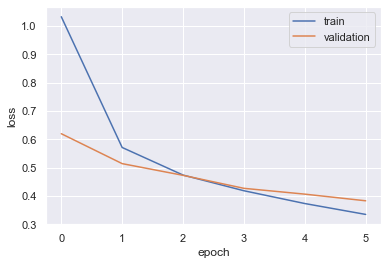

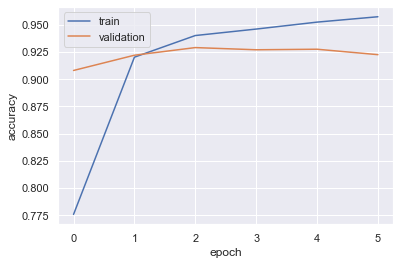

In [38]:
#Create heat map with results
plt.plot(train_history2.history['loss'], label='train')
plt.plot(train_history2.history['val_loss'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show();

plt.plot(train_history2.history['accuracy'], label='train')
plt.plot(train_history2.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show();

In [39]:
X_val = df_val.drop(columns="label")
X_val_ids, X_val_attention = batch_encode(tokenizer, X_val['sentence'].to_list())
df_val_dummies = pd.get_dummies(df_val.label)

In [40]:
model.evaluate([X_val_ids, X_val_attention], np.asarray(df_val_dummies))

63/63 [==============================] - 136s 2s/step - loss: 0.3649 - accuracy: 0.9410


[0.36487430334091187, 0.9409999847412109]